In [1]:
library(Stat2Data)
data(Pulse)
head(Pulse)
attach(Pulse)

,Active,Rest,Smoke,Sex,Exercise,Hgt,Wgt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,97,78,0,1,1,63,119
2,82,68,1,0,3,70,225
3,88,62,0,0,3,72,175
4,106,74,0,0,3,72,170
5,78,63,0,1,3,67,125
6,109,65,0,0,3,74,188


In [2]:
olsmodel = lm(Sex~Hgt)
summary(olsmodel)


Call:
lm(formula = Sex ~ Hgt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90150 -0.20348 -0.00216  0.20574  0.80311 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.343647   0.397563   18.47   <2e-16 ***
Hgt         -0.100658   0.005817  -17.30   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3305 on 230 degrees of freedom
Multiple R-squared:  0.5656,	Adjusted R-squared:  0.5637 
F-statistic: 299.5 on 1 and 230 DF,  p-value: < 2.2e-16


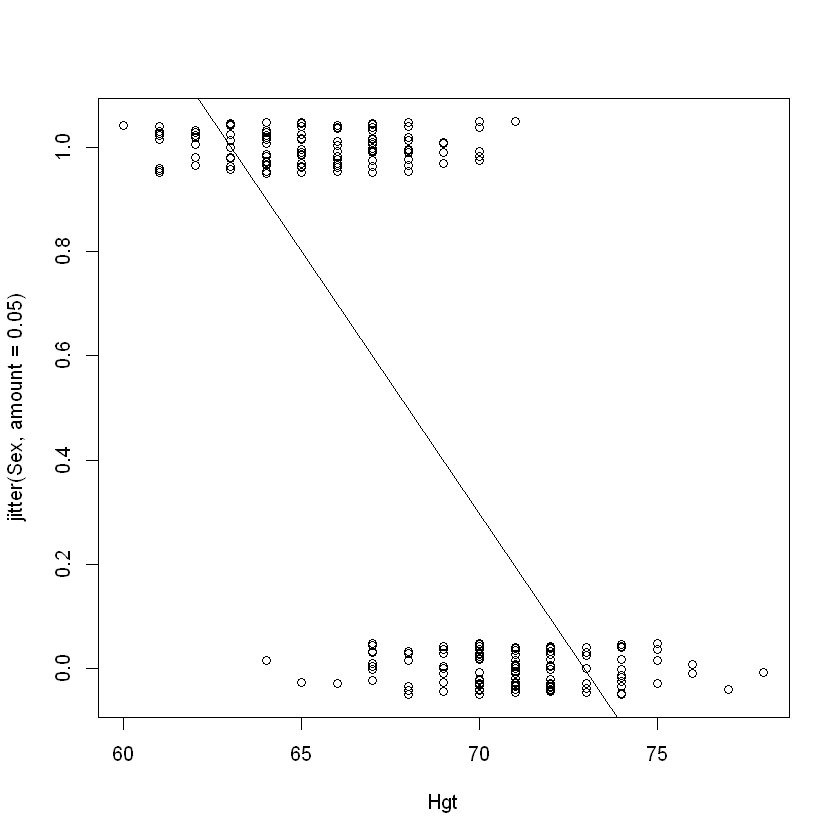

In [3]:
plot(Hgt, jitter(Sex, amount=0.05))
abline(olsmodel)

In [13]:
logitmodel = glm(Sex ~ Hgt, family=binomial)
summary(logitmodel)


Call:
glm(formula = Sex ~ Hgt, family = binomial)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  64.1416     8.3694   7.664 1.81e-14 ***
Hgt          -0.9424     0.1227  -7.680 1.60e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 321.00  on 231  degrees of freedom
Residual deviance: 135.63  on 230  degrees of freedom
AIC: 139.63

Number of Fisher Scoring iterations: 6


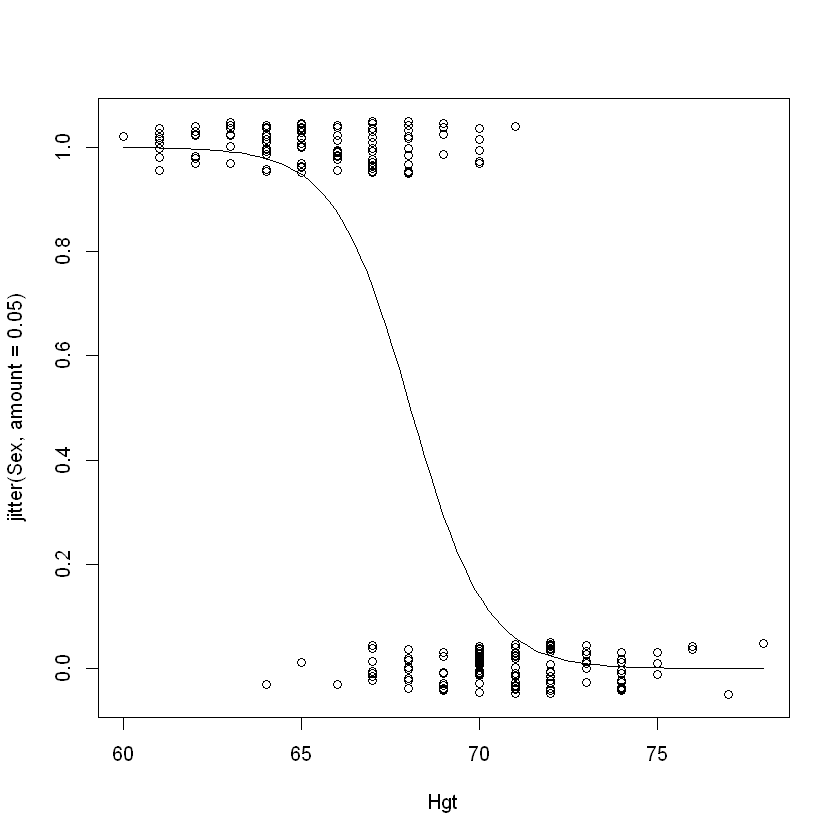

In [14]:
plot(Hgt, jitter(Sex, amount=0.05))
curve(exp(64.1416-0.9424*x)/(1+exp(64.1416-0.9424*x)), add=TRUE)

In [22]:
base = exp(logitmodel$coef[2])
print(base)

      Hgt 
0.3896868 


In [28]:
N = 10000
coefs = c()
for (i in 1:N) {
    S1 = sample(Sex)
    l = glm(S1~Hgt, family=binomial)
    coefs = c(coefs, exp(l$coef[2]))
}
tail = length(coefs[coefs <= base])
p = tail/N
print(p)

[1] 0


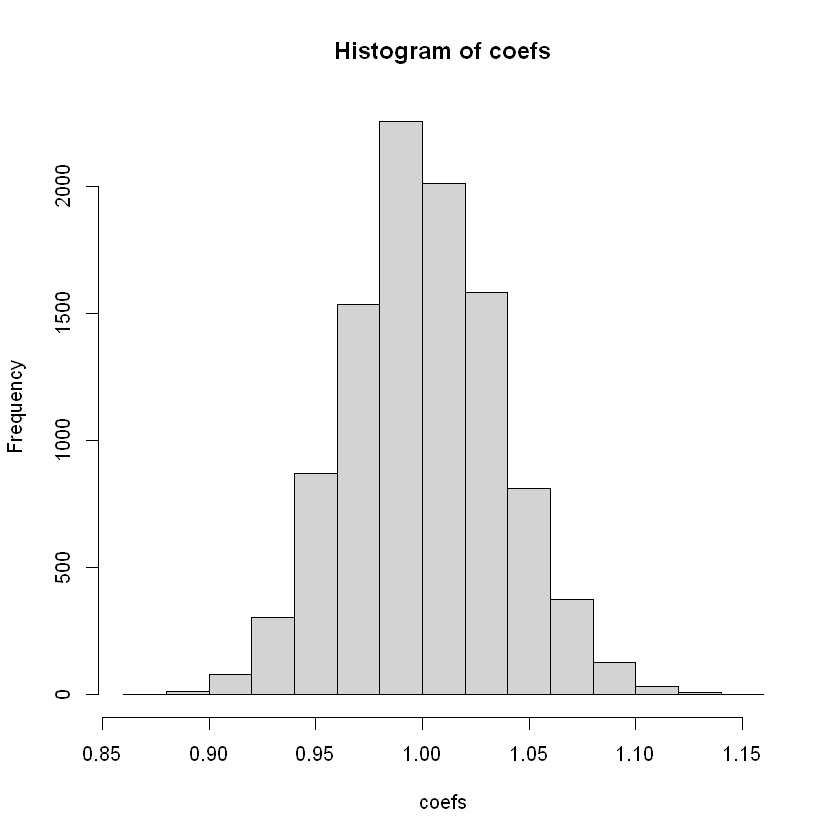

In [29]:
hist(coefs)